In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
import sys
sys.path.append(r"C:\Users\TCSPC\Documents\GitHub\pyTCSPC")

import pyTCSPC as pc

import multipletau as mt

from copy import deepcopy
from glob import glob
from pathlib import Path, PurePath

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams.update({
    "text.usetex": False,
    'font.family': 'sans-serif',
    'font.serif':'Palatino Linotype',
    'font.sans-serif':'Arial',
    'font.size': 12,
    "mathtext.fontset": "stix",
    "svg.fonttype": 'none',
})

import numpy as np

from scipy import ndimage as ndi
from scipy.optimize import curve_fit, least_squares

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.morphology import remove_small_objects
from skimage.filters import threshold_otsu, gaussian

from tqdm.notebook import tqdm, trange

import xarray as xr

In [3]:
from sklearn.linear_model import LinearRegression

In [27]:
%cd "C:\Users\TCSPC\Desktop"

C:\Users\TCSPC\Desktop


In [7]:
spc = pc.SPC("point_000.spc", pixels_per_line=512, nlines=512, n_lines_skip=0, read_paired_sdt=False, show_progress=True, save_images=False)

current file:   0%|          | 0/1622037 [00:00<?, ?it/s]

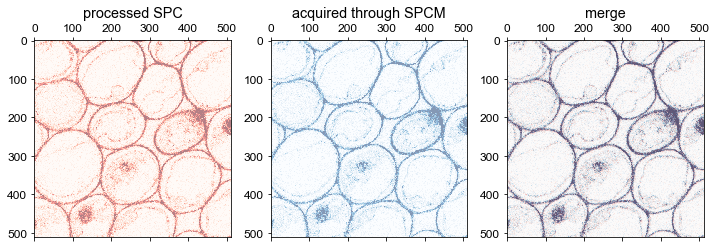

In [29]:
fig, ax = plt.subplots(figsize=(12,4), ncols=3)

im_spc = np.loadtxt("point_000_int.txt").T
im_spcm = pc.intensity_image(pc.load_sdt("img_spcm.sdt").compute(), normalize_num_scans=False).isel(channel=0)

ax[0].matshow(im_spc, vmax=10, cmap="Reds", alpha=0.5)
ax[1].matshow(im_spcm, vmax=10, cmap="Blues", alpha=0.5)
ax[2].matshow(im_spc, vmax=10, cmap="Reds", alpha=0.5)
ax[2].matshow(im_spcm, vmax=10, cmap="Blues", alpha=0.5)
ax[0].set_title("processed SPC")
ax[1].set_title("acquired through SPCM")
ax[2].set_title("merge")

for iax in ax:
    iax.set_aspect(1)